# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [3]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [4]:

# Print dataset shapes

print("Training set shape:", x_train.shape)
print("Training label shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test label shape:", y_test.shape)
print("Image Dimension:", x_train.shape[1:])
num_classes = len(set(y_train.flatten()))
print(f"Number of classes: {num_classes}")

Training set shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test label shape: (10000, 1)
Image Dimension: (32, 32, 3)
Number of classes: 100


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Importing necessary libraries

import tensorflow as tsf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# (x_train, y_train), (x_test, y_test) 

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

num_class = 100

y_train = tsf.keras.utils.to_categorical(y_train, num_class)
y_test = tsf.keras.utils.to_categorical(y_test, num_class)


# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Check the shapes of the splits
print("Training set shape:", x_train.shape)
print("Training Label shape:", y_train.shape)
print("Validation set shape:", x_val.shape)
print("Validation label shape:", y_val.shape)


Training set shape: (40000, 32, 32, 3)
Training Label shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3)
Validation label shape: (10000, 100)



Training set - Min pixel value: 0.0
Training set - Max pixel value: 1.0

One-hot encoded label example:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]


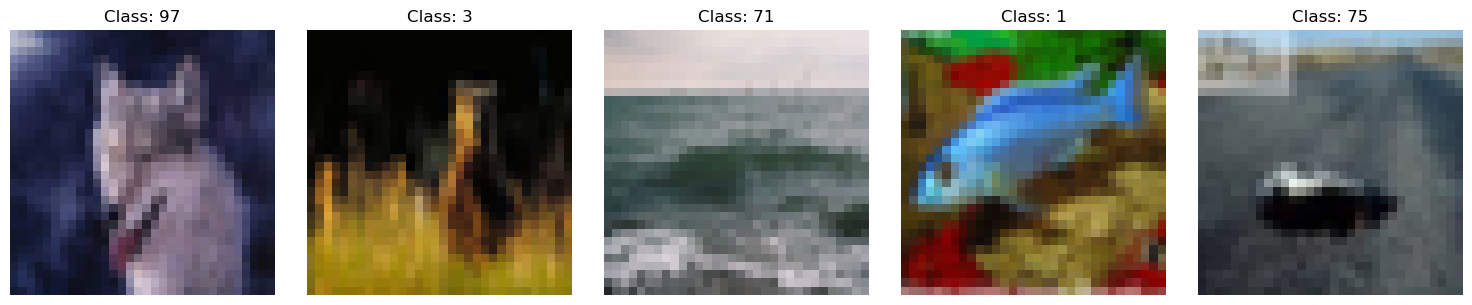

In [6]:
# Verify normalization
print("\nTraining set - Min pixel value:", np.min(x_train))
print("Training set - Max pixel value:", np.max(x_train))

# Verify one-hot encoding
print("\nOne-hot encoded label example:")
print(y_train[0])

# Optional: Visualize a few normalized images
import matplotlib.pyplot as plt

def show_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(x_train, y_train)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()


# convolutional layer One
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# convolutional layer Two
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# convolutional layer Three
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layer
model.add(Dense(units=256, activation='relu'))

# Output layer with 100 classes (CIFAR-100)
model.add(Dense(units=100, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [8]:
from keras import optimizers

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )



## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Training the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=25,
    validation_data=(x_val, y_val)
    )



Epoch 1/25
1250/1250 [==============================] - 102s 80ms/step - loss: 3.7478 - accuracy: 0.1270 - val_loss: 3.2274 - val_accuracy: 0.2185
Epoch 2/25
1250/1250 [==============================] - 85s 68ms/step - loss: 2.9560 - accuracy: 0.2658 - val_loss: 2.8039 - val_accuracy: 0.3005
Epoch 3/25
1250/1250 [==============================] - 94s 75ms/step - loss: 2.5470 - accuracy: 0.3505 - val_loss: 2.6146 - val_accuracy: 0.3347
Epoch 4/25
1250/1250 [==============================] - 100s 80ms/step - loss: 2.2599 - accuracy: 0.4123 - val_loss: 2.5123 - val_accuracy: 0.3678
Epoch 5/25
1250/1250 [==============================] - 503s 402ms/step - loss: 2.0121 - accuracy: 0.4669 - val_loss: 2.4718 - val_accuracy: 0.3736
Epoch 6/25
1250/1250 [==============================] - 84s 68ms/step - loss: 1.7861 - accuracy: 0.5167 - val_loss: 2.5490 - val_accuracy: 0.3732
Epoch 7/25
1250/1250 [==============================] - 122s 97ms/step - loss: 1.5756 - accuracy: 0.5642 - val_loss: 2.6

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______34.7
- <b>Other metric:</b> ______F1 score is the other metric close to accuracy especially in a classification problem like this
- <b>Reason for selection:</b> _____ F1 score unlike accuracy combines recall and precision by giving a score that refleact FP and FN
- <b>Value of metric:</b> ______34.8
- <b>Interpretation of metric value:</b> ______ the F1 score suggest that there is room for improvement in the model and it's amking correct predictions less than half of the time.

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate F1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

313/313 [==============================] - 4s 13ms/step
Test Accuracy: 0.3450
F1-score: 0.3469


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

313/313 [==============================] - 4s 12ms/step


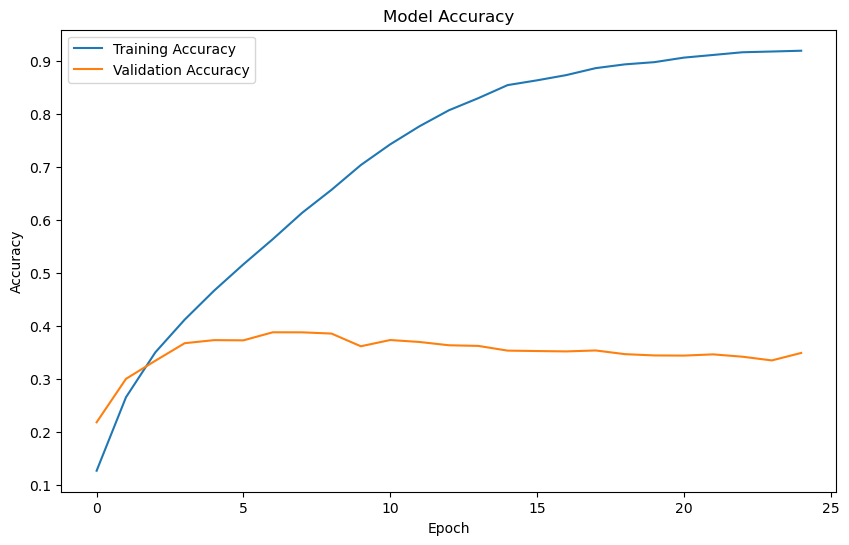

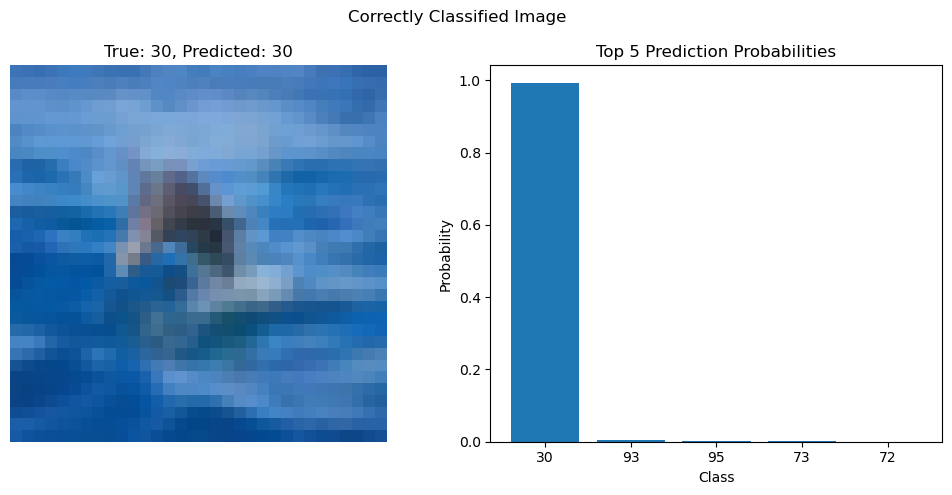

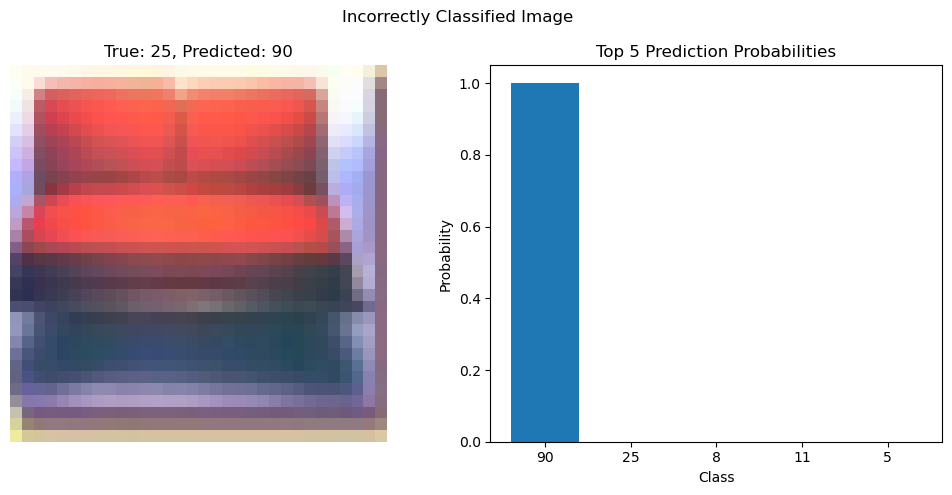

In [11]:
# Your code here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Assuming we've already loaded the CIFAR-100 dataset and trained the model
# If not, you'd need to load the dataset and train the model first

# Convert y_test to one-hot encoded if it's not already
if len(y_test.shape) == 1:
    y_test = to_categorical(y_test, 100)

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find indices of correct and incorrect predictions
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect prediction
correct_idx = np.random.choice(correct_indices)
incorrect_idx = np.random.choice(incorrect_indices)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot correctly classified image
plt.figure(figsize=(10, 5))

# Plot image
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"True: {y_true_classes[correct_idx]}, Predicted: {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot probabilities
plt.subplot(1, 2, 2)
top_5_idx = np.argsort(y_pred[correct_idx])[-5:][::-1]
top_5_probs = y_pred[correct_idx][top_5_idx]
plt.bar(range(5), top_5_probs)
plt.xticks(range(5), top_5_idx)
plt.title('Top 5 Prediction Probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')

plt.suptitle("Correctly Classified Image")
plt.tight_layout()
plt.show()

# Plot incorrectly classified image
plt.figure(figsize=(10, 5))

# Plot image
plt.subplot(1, 2, 1)
plt.imshow(x_test[incorrect_idx])
plt.title(f"True: {y_true_classes[incorrect_idx]}, Predicted: {y_pred_classes[incorrect_idx]}")
plt.axis('off')

# Plot probabilities
plt.subplot(1, 2, 2)
top_5_idx = np.argsort(y_pred[incorrect_idx])[-5:][::-1]
top_5_probs = y_pred[incorrect_idx][top_5_idx]
plt.bar(range(5), top_5_probs)
plt.xticks(range(5), top_5_idx)
plt.title('Top 5 Prediction Probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')

plt.suptitle("Incorrectly Classified Image")
plt.tight_layout()
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [13]:
# Your code here

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Model architecture (same as before)
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model using the data augmentation generator
history = model1.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    epochs=25,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/50
1250/1250 [==============================] - 184s 145ms/step - loss: 4.6064 - accuracy: 0.0092 - val_loss: 4.6060 - val_accuracy: 0.0086
Epoch 2/50
1250/1250 [==============================] - 197s 157ms/step - loss: 4.6059 - accuracy: 0.0096 - val_loss: 4.6066 - val_accuracy: 0.0091
Epoch 3/50
1250/1250 [==============================] - 197s 157ms/step - loss: 4.6059 - accuracy: 0.0092 - val_loss: 4.6067 - val_accuracy: 0.0088
Epoch 4/50
1250/1250 [==============================] - 221s 177ms/step - loss: 4.6057 - accuracy: 0.0087 - val_loss: 4.6068 - val_accuracy: 0.0082
Epoch 5/50
1250/1250 [==============================] - 244s 195ms/step - loss: 4.6057 - accuracy: 0.0099 - val_loss: 4.6069 - val_accuracy: 0.0086
Epoch 6/50
1250/1250 [==============================] - 236s 189ms/step - loss: 4.6058 - accuracy: 0.0089 - val_loss: 4.6069 - val_accuracy: 0.0086
Epoch 7/50
1250/1250 [==============================] - 1746s 1s/step - loss: 4.6058 - accuracy: 0.0093 - val_lo

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [16]:
# Your code here

import numpy as np
from sklearn.metrics import f1_score

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=0)

# Get predictions
y_pred = model1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")




313/313 [==============================] - 12s 36ms/step
Test Accuracy: 0.0100
F1-score: 0.0002


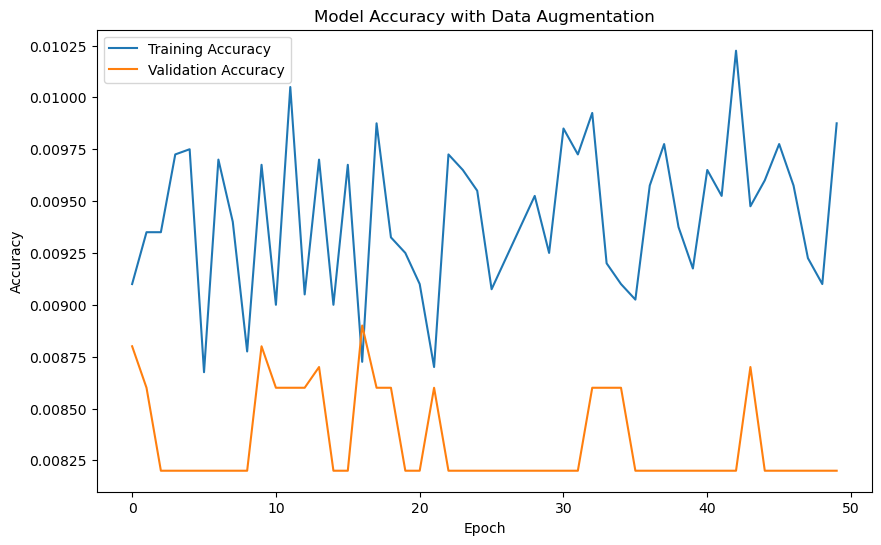

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

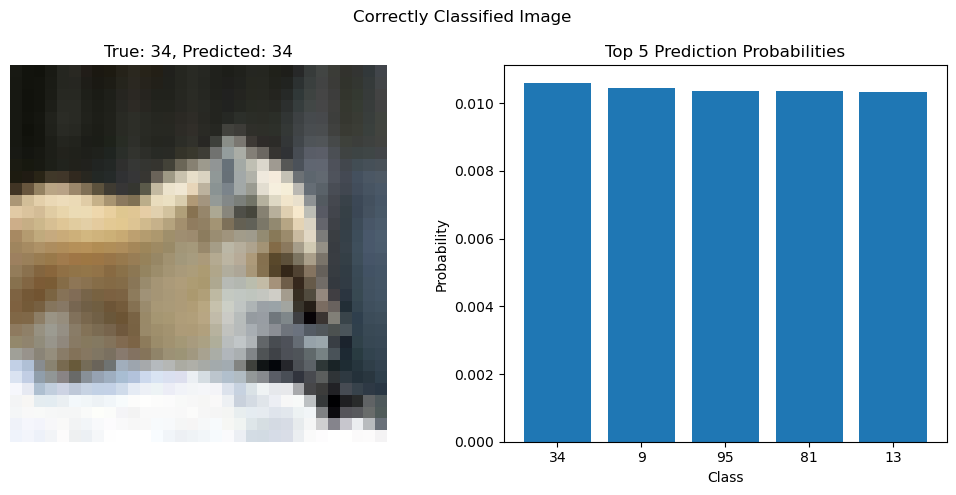

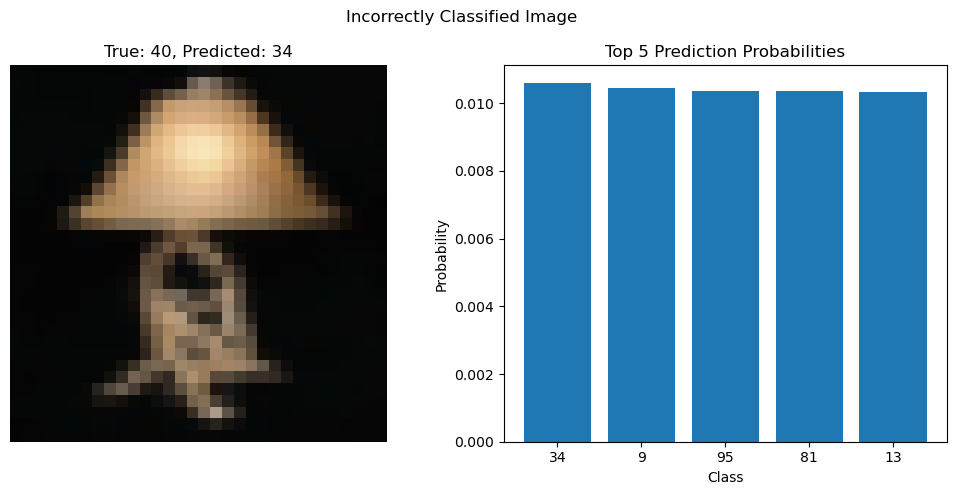

In [103]:
# Select one correct and one incorrect prediction
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]
correct_idx = np.random.choice(correct_indices)
incorrect_idx = np.random.choice(incorrect_indices)

# Function to plot image and probabilities
def plot_image_and_probs(idx, title):
    plt.figure(figsize=(10, 5))
    
    # Plot image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true_classes[idx]}, Predicted: {y_pred_classes[idx]}")
    plt.axis('off')
    
    # Plot probabilities
    plt.subplot(1, 2, 2)
    top_5_idx = np.argsort(y_pred[idx])[-5:][::-1]
    top_5_probs = y_pred[idx][top_5_idx]
    plt.bar(range(5), top_5_probs)
    plt.xticks(range(5), top_5_idx)
    plt.title('Top 5 Prediction Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot correct and incorrect predictions
plot_image_and_probs(correct_idx, "Correctly Classified Image")
plot_image_and_probs(incorrect_idx, "Incorrectly Classified Image")

### Task 4c: Discussion of the results

- Briefly discuss the results. The deployment of advanced model did not impact the performance of the model, instead it reduced it.
- Did the model's performance improve? No
- Why do you think this is? 
- Do you think there is room for further improvement? Why or why not? Maybe a choice of advancement model will further improve the performace.
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.